# Candlesticks

Let's read the data.

In [1]:
import pandas as pd
from pylab import date2num

In [2]:
df = pd.read_json('for_monthly_charts.json',)

In [3]:
df

,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,...,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00
indicators,"{u'ind45': {u'category': u'Housing activity', ...","{u'ind45': {u'category': u'', u'abs_dif': u'0....",{u'ind60': {u'category': u'Industrial producti...,"{u'ind45': {u'category': u'Labor demand', u'ab...","{u'ind45': {u'category': u'', u'abs_dif': u'0....","{u'ind45': {u'category': u'Consumer spending',...","{u'ind45': {u'category': u'Labor demand', u'ab...","{u'ind60': {u'category': u'Labor demand', u'ab...",{u'ind45': {u'category': u'Industrial producti...,"{u'ind45': {u'category': u'Labor demand', u'ab...",...,"{u'ind45': {u'category': u'Labor demand', u'ab...","{u'ind45': {u'category': u'Price inflation', u...","{u'ind45': {u'category': u'Consumer spending',...","{u'ind45': {u'category': u'Labor demand', u'ab...","{u'ind45': {u'category': u'Labor demand', u'ab...","{u'ind45': {u'category': u'', u'abs_dif': u'',...","{u'ind45': {u'category': u'Consumer spending',...","{u'ind45': {u'category': u'Labor demand', u'ab...","{u'ind45': {u'category': u'Housing activity', ...","{u'ind45': {u'category': u'', u'abs_dif': u'0...."
price data,"[{u'C': 1480.5, u'Vol': 4.0, u'H': 1481.5, u'L...","[{u'C': 1401.0, u'Vol': 2.0, u'H': 1401.75, u'...","[{u'C': 1374.0, u'Vol': 5.0, u'H': 1374.0, u'L...","[{u'C': 1513.0, u'Vol': 3.0, u'H': 1513.0, u'L...","[{u'C': 1458.75, u'Vol': 1.0, u'H': 1458.75, u...","[{u'C': 1421.0, u'Vol': 5.0, u'H': 1421.5, u'L...","[{u'C': 1471.75, u'Vol': 7.0, u'H': 1472.0, u'...","[{u'C': 1440.0, u'Vol': 6.0, u'H': 1440.0, u'L...","[{u'C': 1520.0, u'Vol': 6.0, u'H': 1520.75, u'...","[{u'C': 1454.5, u'Vol': 2.0, u'H': 1454.5, u'L...",...,"[{u'C': 1147.25, u'Vol': 562.0, u'H': 1147.25,...","[{u'C': 1128.0, u'Vol': 44.0, u'H': 1128.5, u'...","[{u'C': 1110.0, u'Vol': 103.0, u'H': 1110.0, u...","[{u'C': 1141.5, u'Vol': 13.0, u'H': 1141.75, u...","[{u'C': 1079.25, u'Vol': 4.0, u'H': 1079.5, u'...","[{u'C': 1065.25, u'Vol': 1.0, u'H': 1065.25, u...","[{u'C': 987.25, u'Vol': 27.0, u'H': 987.75, u'...","[{u'C': 906.5, u'Vol': 50.0, u'H': 906.75, u'L...","[{u'C': 910.25, u'Vol': 282.0, u'H': 913.25, u...","[{u'C': 814.0, u'Vol': 39.0, u'H': 814.5, u'L'..."
trades,"[{u'netgain per hour': u'59.16', u'MFE': u'271...","[{u'netgain per hour': u'37.6', u'MFE': u'1150...","[{u'netgain per hour': u'39.68', u'MFE': u'220...","[{u'netgain per hour': u'3492.0', u'MFE': u'12...","[{u'netgain per hour': u'77.78', u'MFE': u'292...","[{u'netgain per hour': u'77.25', u'MFE': u'243...","[{u'netgain per hour': u'11.3', u'MFE': u'1425...","[{u'netgain per hour': u'10.91', u'MFE': u'210...","[{u'netgain per hour': u'8.82', u'MFE': u'1462...","[{u'netgain per hour': u'181.09', u'MFE': u'14...",...,"[{u'netgain per hour': u'8.59', u'MFE': u'1300...","[{u'netgain per hour': u'14.64', u'MFE': u'161...","[{u'netgain per hour': u'12.52', u'MFE': u'218...","[{u'netgain per hour': u'20.65', u'MFE': u'887...","[{u'netgain per hour': u'24.92', u'MFE': u'178...","[{u'netgain per hour': u'40.46', u'MFE': u'143...","[{u'netgain per hour': u'40.92', u'MFE': u'200...","[{u'netgain per hour': u'84.28', u'MFE': u'912...","[{u'netgain per hour': u'68.62', u'MFE': u'687...","[{u'netgain per hour': u'84.57', u'MFE': u'437..."


The goal is to get the chart below.

<img src="for matplotlib output example/2000-01.jpg">

Let's explore chart data.

In [4]:
price = pd.DataFrame(df.ix[1,0])
price['DT'] = pd.to_datetime(price['DT'])
price['num_date'] = price['DT'].apply(date2num)
price.head()

,C,DT,H,L,O,Vol,num_date
0,1480.50,2000-01-03 00:00:00,1481.5,1480.50,1481.50,4.0,730122.000000
1,1480.50,2000-01-03 00:30:00,1480.5,1479.75,1480.25,8.0,730122.020833
2,1481.25,2000-01-03 01:00:00,1481.5,1480.50,1480.50,7.0,730122.041667
3,1481.75,2000-01-03 01:30:00,1482.0,1481.00,1481.50,13.0,730122.062500
4,1488.00,2000-01-03 02:00:00,1488.0,1481.25,1481.50,49.0,730122.083333


We can get candlestick this way.

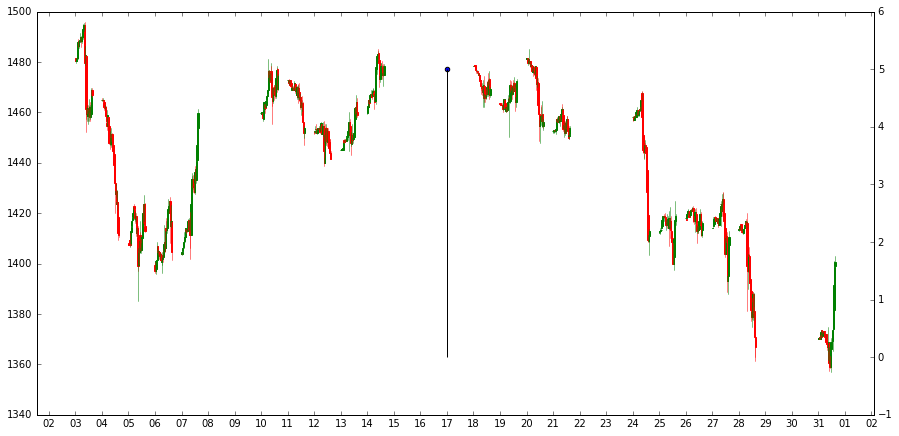

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import MinuteLocator, HourLocator,\
    DayLocator, MONDAY, DateFormatter, WeekdayLocator
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc

from pylab import date2num

mondays = WeekdayLocator(MONDAY)    
alldays = DayLocator() 
allhours = HourLocator()
weekFormatter = DateFormatter('%d')  
dayFormatter = DateFormatter('%d')      
allminutes = MinuteLocator(interval=30)

quotes = price[['num_date','O','L','H','C']].dropna()

if len(quotes) == 0:
    raise SystemExit

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
fig.set_size_inches((15,8))
ax.xaxis.set_major_locator(alldays)
#ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(dayFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)
candlestick_ohlc(ax, quotes.values, width=0.05,colorup='g',colordown='r')
ax.xaxis_date()
ax.autoscale_view()

# annotation here 
ax2 = ax.twinx()
ax2.vlines(730136.,0,5)
ax2.scatter(730136.,5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

I should remove gaps between date, but I'll do it later. The next step is to plot indicators. I think it will be scatter with annotation (number inside circle or box). The plan is:
1. Convert datetime: both from string to date and from date to num.
3. Enumerate indicator within each date to get y coordinate.
4. Plot indicators this corresponding number.

I assume that the max num of indicators is 10.

In [6]:
indicators = pd.DataFrame(df.ix[0,0]).T.reset_index()
indicators['index'] = indicators['index'].apply(lambda x: int(x.strip('ind$')))
indicators['datetime'] = pd.to_datetime(indicators['datetime'],dayfirst=True)
indicators['num_date'] = indicators['datetime'].apply(date2num)
indicators['group_rank'] = 10 - (indicators.groupby('datetime').cumcount())
indicators.head()

,index,Actual,Prior,Revised,S,Std Dev,Surprise,Surv(M),abs_dif,category,datetime,event name,percentile,num_date,group_rank
0,1,55.5,56.2,58.1,95.9677,0.59,-0.84,56,0.5,Industrial production,2000-01-03 10:00:00,US-ISM Manufacturing,14,730122.416667,10
1,2,0.4,1.2,--,0,--,--,,,Consumer spending,2000-01-04 09:00:00,US-Tokyo-Mitsubishi Retail Sales,,730123.375000,10
2,3,2.6,0.30%,1.10%,0,0.32,7.54,0.2,2.4,Housing activity,2000-01-04 10:00:00,US-Construction Spending,92,730123.416667,10
3,4,1.8,1.70%,--,0,--,--,,,Consumer spending,2000-01-04 10:30:00,US-Instinet Redbook Retail Sales,,730123.437500,10
4,5,1.4707,1.43E+07,--,37.0968,0.24,1.67,1.4307,0.04,Consumer spending,2000-01-05 00:00:00,US-Wards Domestic Vehicle Sales,57,730124.000000,10


Add colors.

In [7]:
colors = dict(zip(indicators['category'].unique(),range(9)))
colors

{u'': 7,
 u'Business spending': 8,
 u'Consumer spending': 1,
 u'Housing activity': 2,
 u'Industrial production': 0,
 u'Labor demand': 3,
 u'Manufacturing and trade inventories': 4,
 u'Price inflation': 6,
 u'Trade deficit': 5}

In [8]:
indicators['color'] = indicators['category'].map(colors)
indicators.head()

,index,Actual,Prior,Revised,S,Std Dev,Surprise,Surv(M),abs_dif,category,datetime,event name,percentile,num_date,group_rank,color
0,1,55.5,56.2,58.1,95.9677,0.59,-0.84,56,0.5,Industrial production,2000-01-03 10:00:00,US-ISM Manufacturing,14,730122.416667,10,0
1,2,0.4,1.2,--,0,--,--,,,Consumer spending,2000-01-04 09:00:00,US-Tokyo-Mitsubishi Retail Sales,,730123.375000,10,1
2,3,2.6,0.30%,1.10%,0,0.32,7.54,0.2,2.4,Housing activity,2000-01-04 10:00:00,US-Construction Spending,92,730123.416667,10,2
3,4,1.8,1.70%,--,0,--,--,,,Consumer spending,2000-01-04 10:30:00,US-Instinet Redbook Retail Sales,,730123.437500,10,1
4,5,1.4707,1.43E+07,--,37.0968,0.24,1.67,1.4307,0.04,Consumer spending,2000-01-05 00:00:00,US-Wards Domestic Vehicle Sales,57,730124.000000,10,1


Lets plot it.

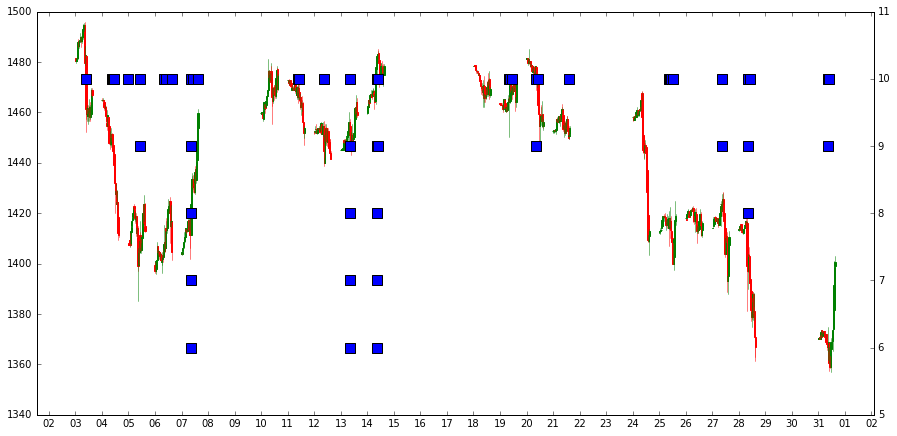

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import MinuteLocator, HourLocator,\
    DayLocator, MONDAY, DateFormatter, WeekdayLocator
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc

from pylab import date2num

mondays = WeekdayLocator(MONDAY)    
alldays = DayLocator() 
allhours = HourLocator()
weekFormatter = DateFormatter('%d')  
dayFormatter = DateFormatter('%d')      
allminutes = MinuteLocator(interval=30)

quotes = price[['DT','O','L','H','C']].dropna()
quotes['DT'] = price['DT'].apply(date2num)

if len(quotes) == 0:
    raise SystemExit

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
fig.set_size_inches((15,8))
ax.xaxis.set_major_locator(alldays)
#ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(dayFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)
candlestick_ohlc(ax, quotes.values, width=0.05,colorup='g',colordown='r')
ax.xaxis_date()
ax.autoscale_view()

# annotation here 
ax2 = ax.twinx()
#ax2.vlines(730136.,0,5)

ax2.scatter(indicators['num_date'],
            indicators['group_rank'],
            marker='s',
            s=100)


plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()